# Occupation-Level Employment Forecasts (2024-2034)

**Purpose**: Generate and visualize occupation-level employment forecasts for Michigan automotive segments through 2034, with emphasis on 2030 projections.

**Methodology**:
1. Adjust 2024 MCDA staffing patterns by auto attribution (BEA and Lightcast)
2. Apply segment employment growth rates (Moody's and BLS-derived)
3. Incorporate BLS occupational shift trends (2024-2034)

**Data Sources**:
- `data/interim/mcda_staffing_long_2021_2024.csv` - MCDA 2024 staffing base
- `data/raw/auto_attribution_*.csv` - BEA and Lightcast auto shares
- `data/processed/mi_qcew_segment_employment_timeseries_*_extended_*.csv` - Segment forecasts
- `data/raw/us_staffing_patterns/*.csv` - BLS occupational shift data

**Key Outputs**:
- Occupation-level forecasts by segment, year, and methodology
- 2030 employment snapshot for workforce planning
- Top occupations by employment and growth
- Methodology comparison visualizations

**Dependencies**: Run `scripts/create_occupation_forecasts.py` first

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

%matplotlib inline

## 1. Load Occupation Forecast Data

In [2]:
# Load comprehensive forecast file
forecasts = pd.read_csv('../data/processed/mi_occupation_employment_forecasts_2024_2034.csv')

print(f"Total forecast records: {len(forecasts):,}")
print(f"Unique occupations: {forecasts['occupation_code'].nunique()}")
print(f"Unique segments: {forecasts['segment_id'].nunique()}")
print(f"Years: {forecasts['year'].min()}-{forecasts['year'].max()}")
print(f"\nMethodologies:")
print(forecasts['methodology'].value_counts())

Total forecast records: 50,996
Unique occupations: 275
Unique segments: 10
Years: 2024-2034

Methodologies:
methodology
bea_Moody          12749
bea_BLS            12749
lightcast_Moody    12749
lightcast_BLS      12749
Name: count, dtype: int64


In [3]:
# Preview data structure
forecasts.head(10)

,segment_id,segment_name,occupation_code,occupation_title,year,employment,attribution,growth_source,methodology,has_bls_shift
0,1,1. Materials & Processing,11-1011,Chief Executives,2024,0.03,bea,Moody,bea_Moody,True
1,1,1. Materials & Processing,11-1011,Chief Executives,2025,0.03,bea,Moody,bea_Moody,True
2,1,1. Materials & Processing,11-1011,Chief Executives,2026,0.03,bea,Moody,bea_Moody,True
3,1,1. Materials & Processing,11-1011,Chief Executives,2027,0.03,bea,Moody,bea_Moody,True
4,1,1. Materials & Processing,11-1011,Chief Executives,2028,0.03,bea,Moody,bea_Moody,True
5,1,1. Materials & Processing,11-1011,Chief Executives,2029,0.03,bea,Moody,bea_Moody,True
6,1,1. Materials & Processing,11-1011,Chief Executives,2030,0.03,bea,Moody,bea_Moody,True
7,1,1. Materials & Processing,11-1011,Chief Executives,2031,0.03,bea,Moody,bea_Moody,True
8,1,1. Materials & Processing,11-1011,Chief Executives,2032,0.03,bea,Moody,bea_Moody,True
9,1,1. Materials & Processing,11-1011,Chief Executives,2033,0.03,bea,Moody,bea_Moody,True


## 2. Load 2030 Snapshot

In [4]:
# Load 2030 projection (key year for planning)
forecast_2030 = pd.read_csv('../data/processed/mi_occupation_employment_forecast_2030.csv')

print(f"2030 occupation forecasts: {len(forecast_2030):,}")
print(f"\nTotal 2030 employment by methodology:")
methodology_totals = forecast_2030.groupby('methodology')['employment'].sum()
for method, total in methodology_totals.items():
    print(f"  {method}: {total:,.0f}")

2030 occupation forecasts: 4,636

Total 2030 employment by methodology:
  bea_BLS: 4,413
  bea_Moody: 4,439
  lightcast_BLS: 4,450
  lightcast_Moody: 4,538


## 3. Top Occupations in 2030

In [5]:
# Top 20 occupations by average 2030 employment across methodologies
top_occs_2030 = forecast_2030.groupby(['occupation_code', 'occupation_title'])['employment'].mean().reset_index()
top_occs_2030 = top_occs_2030.sort_values('employment', ascending=False).head(20)

print("Top 20 Occupations by 2030 Employment (avg across methodologies):\n")
for idx, row in top_occs_2030.iterrows():
    print(f"{row['occupation_code']:8s}  {row['employment']:8,.0f}  {row['occupation_title']}")

Top 20 Occupations by 2030 Employment (avg across methodologies):

47-5022         81  Excavating and Loading Machine and Dragline Operators, Surface Mining
41-2011         63  Cashiers
23-2099         46  Legal Support Workers, All Other
51-4192         42  Layout Workers, Metal and Plastic
51-2090         41  Miscellaneous Assemblers and Fabricators
49-3023         37  Automotive Service Technicians and Mechanics
51-2061         28  Timing Device Assemblers and Adjusters
49-3021         26  Automotive Body and Related Repairers
13-1141         24  Compensation, Benefits, and Job Analysis Specialists
49-9098         23  Helpers--Installation, Maintenance, and Repair Workers
41-2031         22  Retail Salespersons
11-9021         20  Construction Managers
51-9195         20  Molders, Shapers, and Casters, Except Metal and Plastic
15-1241         20  Computer Network Architects
41-2022         20  Parts Salespersons
17-2081         20  Environmental Engineers
17-2111         20  Health 

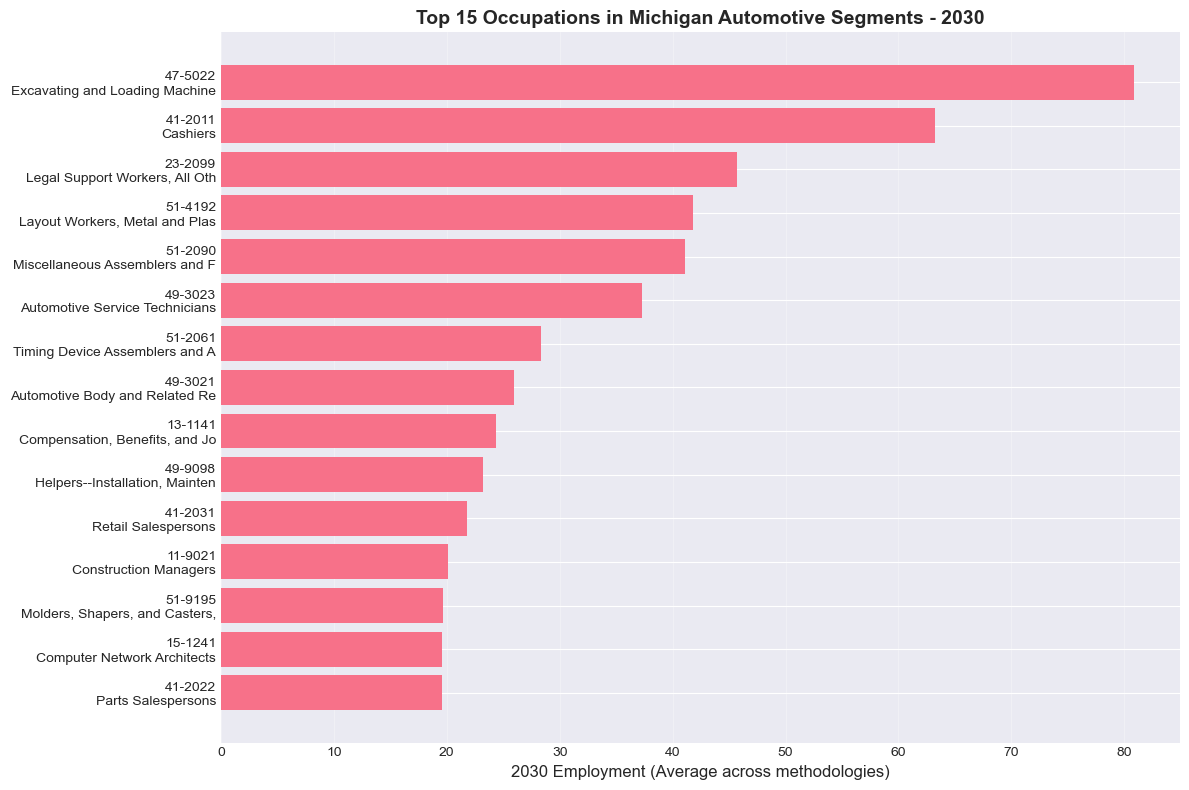

In [6]:
# Visualize top 15 occupations
fig, ax = plt.subplots(figsize=(12, 8))

top_15 = top_occs_2030.head(15).sort_values('employment')
ax.barh(range(len(top_15)), top_15['employment'])
ax.set_yticks(range(len(top_15)))
ax.set_yticklabels([f"{code}\n{title[:30]}" for code, title in 
                     zip(top_15['occupation_code'], top_15['occupation_title'])])
ax.set_xlabel('2030 Employment (Average across methodologies)', fontsize=12)
ax.set_title('Top 15 Occupations in Michigan Automotive Segments - 2030', fontsize=14, fontweight='bold')
ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('../reports/figures/occupation_top15_2030.png', dpi=300, bbox_inches='tight')
plt.show()

## 4. Employment Growth by Occupation (2024-2030)

In [7]:
# Calculate growth rates for each occupation (avg across methodologies)
growth_data = []

for occ_code in forecasts['occupation_code'].unique():
    occ_forecasts = forecasts[forecasts['occupation_code'] == occ_code]
    
    emp_2024 = occ_forecasts[occ_forecasts['year'] == 2024]['employment'].mean()
    emp_2030 = occ_forecasts[occ_forecasts['year'] == 2030]['employment'].mean()
    
    if emp_2024 > 0:
        pct_change = ((emp_2030 - emp_2024) / emp_2024) * 100
        abs_change = emp_2030 - emp_2024
        
        growth_data.append({
            'occupation_code': occ_code,
            'occupation_title': occ_forecasts['occupation_title'].iloc[0],
            'employment_2024': emp_2024,
            'employment_2030': emp_2030,
            'absolute_change': abs_change,
            'percent_change': pct_change
        })

growth_df = pd.DataFrame(growth_data)

# Top 10 fastest growing (by % change)
print("\nTop 10 Fastest Growing Occupations (2024-2030, % change):\n")
fastest_growth = growth_df.nlargest(10, 'percent_change')
for idx, row in fastest_growth.iterrows():
    print(f"{row['occupation_code']:8s}  {row['percent_change']:+7.1f}%  {row['occupation_title']}")

# Top 10 declining occupations
print("\nTop 10 Declining Occupations (2024-2030, % change):\n")
fastest_decline = growth_df.nsmallest(10, 'percent_change')
for idx, row in fastest_decline.iterrows():
    print(f"{row['occupation_code']:8s}  {row['percent_change']:+7.1f}%  {row['occupation_title']}")


Top 10 Fastest Growing Occupations (2024-2030, % change):

15-2051     +20.5%  Data Scientists
11-9111     +17.2%  Medical and Health Services Managers
15-2041     +15.8%  Statisticians
49-9041     +11.1%  Industrial Machinery Mechanics
13-1151      +7.1%  Training and Development Specialists
15-1255      +6.8%  Web and Digital Interface Designers
53-3053      +6.3%  Shuttle Drivers and Chauffeurs
49-3042      +6.1%  Mobile Heavy Equipment Mechanics, Except Engines
49-3041      +6.1%  Farm Equipment Mechanics and Service Technicians
11-3031      +5.4%  Financial Managers

Top 10 Declining Occupations (2024-2030, % change):

37-3011     -45.1%  Landscaping and Groundskeeping Workers
33-9032     -35.1%  Security Guards
43-3051     -33.1%  Payroll and Timekeeping Clerks
43-4071     -28.2%  File Clerks
51-4191     -22.0%  Heat Treating Equipment Setters, Operators, and Tenders, Metal and Plastic
51-4062     -18.2%  Patternmakers, Metal and Plastic
51-4022     -16.5%  Forging Machine Sette

In [8]:
# Top 10 by absolute employment change
print("\nTop 10 Largest Absolute Employment Gains (2024-2030):\n")
largest_gains = growth_df.nlargest(10, 'absolute_change')
for idx, row in largest_gains.iterrows():
    print(f"{row['occupation_code']:8s}  {row['absolute_change']:+8,.0f}  {row['occupation_title']}")

print("\nTop 10 Largest Absolute Employment Losses (2024-2030):\n")
largest_losses = growth_df.nsmallest(10, 'absolute_change')
for idx, row in largest_losses.iterrows():
    print(f"{row['occupation_code']:8s}  {row['absolute_change']:+8,.0f}  {row['occupation_title']}")


Top 10 Largest Absolute Employment Gains (2024-2030):

49-3023         +1  Automotive Service Technicians and Mechanics
23-2099         +1  Legal Support Workers, All Other
49-9041         +1  Industrial Machinery Mechanics
51-2061         +0  Timing Device Assemblers and Adjusters
53-7061         +0  Cleaners of Vehicles and Equipment
41-2031         +0  Retail Salespersons
49-3041         +0  Farm Equipment Mechanics and Service Technicians
41-2021         +0  Counter and Rental Clerks
53-3053         +0  Shuttle Drivers and Chauffeurs
41-2022         +0  Parts Salespersons

Top 10 Largest Absolute Employment Losses (2024-2030):

47-5022         -4  Excavating and Loading Machine and Dragline Operators, Surface Mining
51-4192         -1  Layout Workers, Metal and Plastic
51-2090         -1  Miscellaneous Assemblers and Fabricators
43-4161         -1  Human Resources Assistants, Except Payroll and Timekeeping
53-3032         -1  Heavy and Tractor-Trailer Truck Drivers
13-1141        

## 5. Segment-Level Analysis

In [9]:
# Total employment by segment in 2030 (average across methodologies)
segment_2030 = forecast_2030.groupby(['segment_id', 'segment_name'])['employment'].mean().reset_index()
segment_2030 = segment_2030.sort_values('segment_id')

print("2030 Employment by Segment (avg across methodologies):\n")
for idx, row in segment_2030.iterrows():
    print(f"Segment {row['segment_id']:2.0f}: {row['employment']:8,.0f}  {row['segment_name']}")

2030 Employment by Segment (avg across methodologies):

Segment  1:        2  1. Materials & Processing
Segment  2:        1  2. Equipment Manufacturing
Segment  3:        0  3.Forging and foundries
Segment  4:        1  4. Parts & Machining
Segment  5:        1  5. Component Systems
Segment  6:        0  6. Engineering & Design
Segment  7:       12  7. Core Automotive
Segment  8:        8  8. Motor Vehicle Parts, Materia
Segment  9:        9  9. Dealers, Maintenance, & Repa
Segment 10:       11  10. Logistics


C:\Users\vasilauskas\AppData\Local\Temp\ipykernel_4336\2640466770.py:18: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


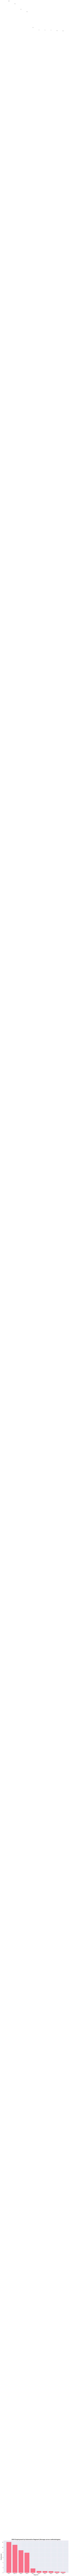

In [10]:
# Visualize segment employment in 2030
fig, ax = plt.subplots(figsize=(12, 6))

segment_2030_sorted = segment_2030.sort_values('employment', ascending=False)
ax.bar(range(len(segment_2030_sorted)), segment_2030_sorted['employment'])
ax.set_xticks(range(len(segment_2030_sorted)))
ax.set_xticklabels([f"Seg {int(s)}" for s in segment_2030_sorted['segment_id']], rotation=0)
ax.set_ylabel('Employment', fontsize=12)
ax.set_xlabel('Segment', fontsize=12)
ax.set_title('2030 Employment by Automotive Segment (Average across methodologies)', 
             fontsize=14, fontweight='bold')
ax.grid(axis='y', alpha=0.3)

# Add value labels
for i, v in enumerate(segment_2030_sorted['employment']):
    ax.text(i, v + 1000, f'{v:,.0f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig('../reports/figures/occupation_segment_employment_2030.png', dpi=300, bbox_inches='tight')
plt.show()

## 6. Methodology Comparison

In [11]:
# Compare total 2030 employment across all 4 methodologies
methodology_comparison = forecast_2030.groupby('methodology')['employment'].sum().reset_index()
methodology_comparison = methodology_comparison.sort_values('employment', ascending=False)

print("2030 Total Employment by Methodology:\n")
for idx, row in methodology_comparison.iterrows():
    print(f"{row['methodology']:20s}: {row['employment']:,.0f}")

# Calculate spread
min_emp = methodology_comparison['employment'].min()
max_emp = methodology_comparison['employment'].max()
spread = max_emp - min_emp
spread_pct = (spread / min_emp) * 100

print(f"\nMethodology spread: {spread:,.0f} ({spread_pct:.1f}%)")

2030 Total Employment by Methodology:

lightcast_Moody     : 4,538
lightcast_BLS       : 4,450
bea_Moody           : 4,439
bea_BLS             : 4,413

Methodology spread: 125 (2.8%)


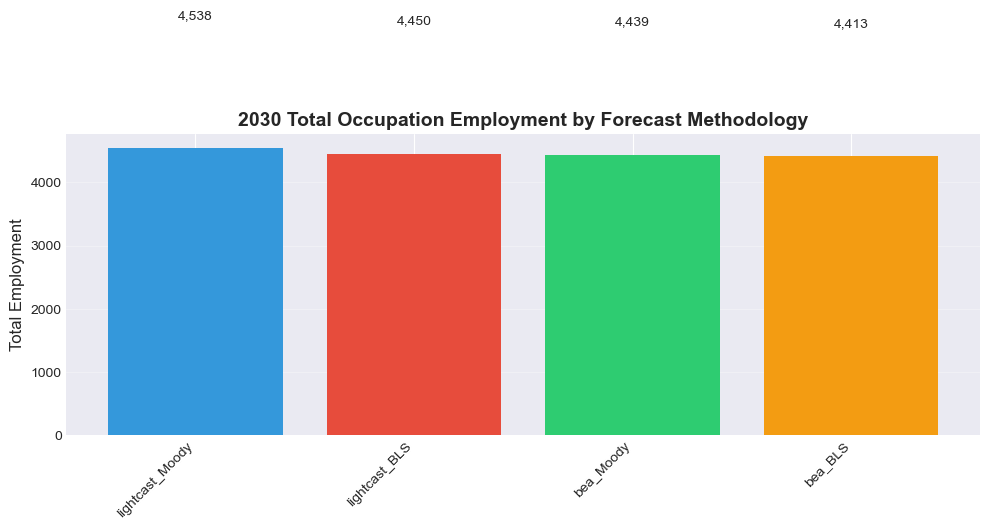

In [12]:
# Visualize methodology comparison
fig, ax = plt.subplots(figsize=(10, 6))

colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12']
ax.bar(range(len(methodology_comparison)), methodology_comparison['employment'], color=colors)
ax.set_xticks(range(len(methodology_comparison)))
ax.set_xticklabels(methodology_comparison['methodology'], rotation=45, ha='right')
ax.set_ylabel('Total Employment', fontsize=12)
ax.set_title('2030 Total Occupation Employment by Forecast Methodology', 
             fontsize=14, fontweight='bold')
ax.grid(axis='y', alpha=0.3)

# Add value labels
for i, v in enumerate(methodology_comparison['employment']):
    ax.text(i, v + 2000, f'{v:,.0f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig('../reports/figures/occupation_methodology_comparison_2030.png', dpi=300, bbox_inches='tight')
plt.show()

## 7. Time Series Analysis: Selected Occupations

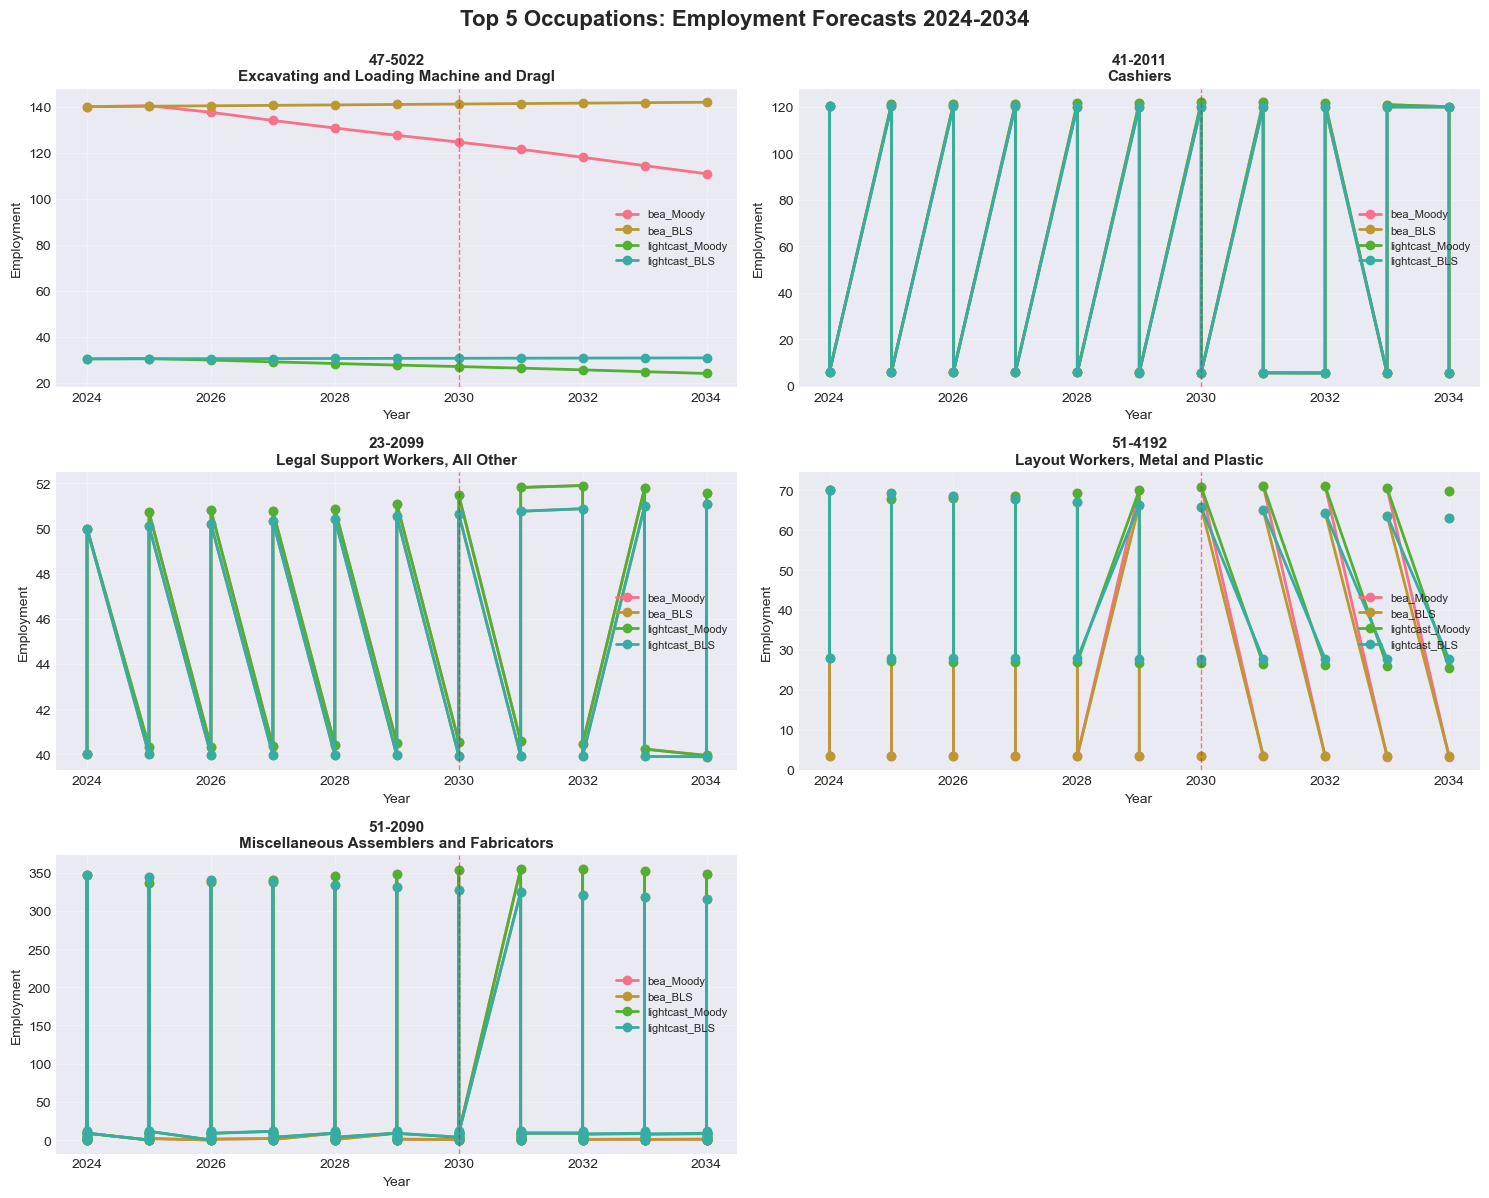

In [13]:
# Select top 5 occupations by 2030 employment for time series visualization
top_5_occs = top_occs_2030.head(5)['occupation_code'].values

fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.flatten()

for idx, occ_code in enumerate(top_5_occs):
    ax = axes[idx]
    
    occ_data = forecasts[forecasts['occupation_code'] == occ_code]
    occ_title = occ_data['occupation_title'].iloc[0]
    
    # Plot each methodology
    for methodology in occ_data['methodology'].unique():
        method_data = occ_data[occ_data['methodology'] == methodology]
        method_data = method_data.sort_values('year')
        ax.plot(method_data['year'], method_data['employment'], 
                marker='o', label=methodology, linewidth=2)
    
    ax.set_xlabel('Year', fontsize=10)
    ax.set_ylabel('Employment', fontsize=10)
    ax.set_title(f"{occ_code}\n{occ_title[:40]}", fontsize=11, fontweight='bold')
    ax.legend(fontsize=8, loc='best')
    ax.grid(alpha=0.3)
    ax.axvline(x=2030, color='red', linestyle='--', alpha=0.5, linewidth=1)

# Remove extra subplot
fig.delaxes(axes[5])

plt.suptitle('Top 5 Occupations: Employment Forecasts 2024-2034', 
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.savefig('../reports/figures/occupation_top5_timeseries_2024_2034.png', dpi=300, bbox_inches='tight')
plt.show()

## 8. Occupational Shifts: BLS vs. Constant Share

In [14]:
# Analyze impact of BLS occupational shift adjustments
shift_impact = forecasts[forecasts['year'].isin([2024, 2030])].copy()

print(f"Occupations with BLS shift data: {shift_impact['has_bls_shift'].sum() / len(shift_impact) * 100:.1f}%")

# Compare growth rates for occupations with vs. without BLS shifts
with_bls = shift_impact[shift_impact['has_bls_shift'] == True]
without_bls = shift_impact[shift_impact['has_bls_shift'] == False]

print(f"\nOccupations WITH BLS shifts: {with_bls['occupation_code'].nunique()}")
print(f"Occupations WITHOUT BLS shifts: {without_bls['occupation_code'].nunique()}")

Occupations with BLS shift data: 99.5%

Occupations WITH BLS shifts: 274
Occupations WITHOUT BLS shifts: 6


## 9. Export 2030 Summary for Reporting

In [15]:
# Create a clean 2030 summary table for stakeholder reporting
summary_2030 = forecast_2030.groupby(['occupation_code', 'occupation_title'])['employment'].agg([
    ('min_employment', 'min'),
    ('max_employment', 'max'),
    ('avg_employment', 'mean'),
    ('std_employment', 'std')
]).reset_index()

summary_2030 = summary_2030.sort_values('avg_employment', ascending=False)

# Add segment info (most common segment for each occupation)
occ_segments = forecast_2030.groupby('occupation_code')['segment_name'].agg(lambda x: x.mode()[0]).reset_index()
summary_2030 = summary_2030.merge(occ_segments, on='occupation_code')

# Save
summary_2030.to_csv('../data/processed/mi_occupation_2030_summary_report.csv', index=False)
print("Saved 2030 summary report: data/processed/mi_occupation_2030_summary_report.csv")

# Preview
summary_2030.head(20)

Saved 2030 summary report: data/processed/mi_occupation_2030_summary_report.csv


,occupation_code,occupation_title,min_employment,max_employment,avg_employment,std_employment,segment_name
0,47-5022,Excavating and Loading Machine and Dragline Op...,27.11,141.16,80.90,60.43,10. Logistics
1,41-2011,Cashiers,5.48,121.84,63.21,61.68,"8. Motor Vehicle Parts, Materia"
2,23-2099,"Legal Support Workers, All Other",39.93,51.49,45.66,5.80,"8. Motor Vehicle Parts, Materia"
3,51-4192,"Layout Workers, Metal and Plastic",3.38,70.77,41.79,29.73,1. Materials & Processing
4,51-2090,Miscellaneous Assemblers and Fabricators,0.00,352.78,41.10,107.37,1. Materials & Processing
5,49-3023,Automotive Service Technicians and Mechanics,0.85,128.44,37.32,48.01,1. Materials & Processing
6,51-2061,Timing Device Assemblers and Adjusters,8.21,49.83,28.32,22.92,5. Component Systems
7,49-3021,Automotive Body and Related Repairers,1.67,107.47,25.97,33.80,1. Materials & Processing
8,13-1141,"Compensation, Benefits, and Job Analysis Speci...",0.00,50.55,24.37,26.09,1. Materials & Processing
9,49-9098,"Helpers--Installation, Maintenance, and Repair...",0.02,90.99,23.22,38.56,1. Materials & Processing


## 10. Key Findings Summary

### Findings to document:
- Total 2030 employment across methodologies
- Top growing and declining occupations
- Segments with largest occupational employment
- Methodology sensitivity analysis
- Impact of BLS occupational shifts vs. constant share assumptions

In [16]:
print("\n" + "="*80)
print("OCCUPATION FORECAST ANALYSIS SUMMARY")
print("="*80)
print(f"\nTotal forecasts generated: {len(forecasts):,}")
print(f"Unique occupations: {forecasts['occupation_code'].nunique()}")
print(f"Segments covered: {forecasts['segment_id'].nunique()}")
print(f"Methodologies: {forecasts['methodology'].nunique()} (BEA/Lightcast × Moody/BLS)")
print(f"\n2030 Total Employment Range:")
print(f"  Minimum: {methodology_comparison['employment'].min():,.0f}")
print(f"  Maximum: {methodology_comparison['employment'].max():,.0f}")
print(f"  Average: {methodology_comparison['employment'].mean():,.0f}")
print(f"  Spread: {spread_pct:.1f}%")
print("\nKey outputs saved:")
print("  - data/processed/mi_occupation_employment_forecasts_2024_2034.csv")
print("  - data/processed/mi_occupation_employment_forecast_2030.csv")
print("  - data/processed/mi_occupation_2030_summary_report.csv")
print("  - reports/figures/occupation_*.png (multiple charts)")


OCCUPATION FORECAST ANALYSIS SUMMARY

Total forecasts generated: 50,996
Unique occupations: 275
Segments covered: 10
Methodologies: 4 (BEA/Lightcast × Moody/BLS)

2030 Total Employment Range:
  Minimum: 4,413
  Maximum: 4,538
  Average: 4,460
  Spread: 2.8%

Key outputs saved:
  - data/processed/mi_occupation_employment_forecasts_2024_2034.csv
  - data/processed/mi_occupation_employment_forecast_2030.csv
  - data/processed/mi_occupation_2030_summary_report.csv
  - reports/figures/occupation_*.png (multiple charts)
